# Conhecendo os dados

### 1. Importando Bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### 2. Carregando e Explorando os Dados:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Tamireees/Datathon-Projeto-Passos-Magicos/refs/heads/main/dados/PEDE_PASSOS_DATASET_FIAP.csv', sep=';')

* *Identificamos que seria benéfico dividir os dados por ano, pois essa abordagem nos permitiria obter uma visualização mais clara e detalhada das informações, além de facilitar uma análise mais precisa ao observar as variações e tendências ao longo de diferentes períodos.*

### Criação de funções:
(para dividir os dataframes, realizar a limpeza dos dados, gerar o mapa de correlação e criar o gráfico de contagem)

In [3]:
def filter_columns(df, filters: list): # adiciono no array o padrão que existe nas colunas e que não quero que tenha na saída final
    selected_columns = [True] * len(df.columns)  # Inicializa todas as colunas como True
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]


In [4]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
  return _df

In [5]:
def plot_exact_counter(size, x, y, df) -> None:
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values)
  plt.xlabel(x)
  plt.ylabel('Count')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

In [6]:
def analyse_corr(df):
  import seaborn as sns
  import matplotlib.pyplot as plt

  df = df.apply(pd.to_numeric, errors='coerce')

  corr_matrix = df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
  plt.show()

## 2020

### **Conhecendo os dados:**

In [7]:
df_2020 = filter_columns(df, ['2021', '2022'])
df_2020 = cleaning_dataset(df_2020)
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10
7,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10


In [8]:
df_2020_clean = df_2020


In [9]:
df_2020_clean = df_2020_clean[df_2020_clean['PEDRA_2020'] != 'D9891/2A']

In [10]:
# Alterando a quantidade de anos que estao no Passos Magicos, para o ano correspondente. E alterando o nome da coluna:
ano_map_2020 = {
2020: '0',
2019: '1',
2018: '2',
2017: '3',
2016: '4',
None: 'D971'
}

reverse_ano_map_2020 = {v: k for k, v in ano_map_2020.items()}
df_2020_clean['ANOS_PM_2020'] = (df_2020_clean['ANOS_PM_2020'].map(reverse_ano_map_2020))

df_2020_clean.rename(columns={'ANOS_PM_2020': 'ANO_INGRESSO_2020'}, inplace=True)

df_2020_clean['ANO_INGRESSO_2020'] = pd.to_datetime(df_2020_clean['ANO_INGRESSO_2020'], format='%Y')
# Extraindo apenas o ano
df_2020_clean['ANO_INGRESSO_2020'] = df_2020_clean['ANO_INGRESSO_2020'].dt.year

In [11]:
# Separando a parte numérica e a parte alfabética
df_2020_clean['FASE_2020'] = df_2020_clean['FASE_TURMA_2020'].str.extract('(\d+)')  # Captura os números
df_2020_clean['TURMA_2020'] = df_2020_clean['FASE_TURMA_2020'].str.extract('([A-Za-z]+)')  # Captura as letras



In [12]:
# Transformar as colunas de categorias em valores binários (0 e 1)
df_2020_clean['PONTO_VIRADA_2020'] = df_2020_clean['PONTO_VIRADA_2020'].apply(lambda x: 1 if x == 'Sim' else 0)

In [13]:
df_2020_clean['INDE_2020'] = pd.to_numeric(df_2020_clean['INDE_2020'], errors='coerce')

In [14]:
df_2020_clean['PEDRA_2020'] = pd.Categorical(df_2020_clean['PEDRA_2020'])

In [15]:
# Não tem definição essa coluna.
df_2020_clean['INDE_CONCEITO_2020'].unique()

array(['B', 'D', 'A', 'C'], dtype=object)

In [16]:
df_2020_clean['DESTAQUE_IPV_2020'] = df_2020_clean['DESTAQUE_IPV_2020'].apply(lambda x: 1 if isinstance(x, str) and 'Seu destaque em 2020:' in x else 0)
df_2020_clean['DESTAQUE_IDA_2020'] = df_2020_clean['DESTAQUE_IDA_2020'].apply(lambda x: 1 if 'Seu destaque' in x else 0)
df_2020_clean['DESTAQUE_IEG_2020'] = df_2020_clean['DESTAQUE_IEG_2020'].apply(lambda x: 1 if 'Seu destaque' in x else 0)


In [17]:
df_2020_clean[['IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']] = df_2020_clean[['IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']].apply(pd.to_numeric, errors='coerce')

In [18]:
df_2020_clean = df_2020_clean.drop(columns=['TURMA_2020', 'FASE_TURMA_2020', 'INSTITUICAO_ENSINO_ALUNO_2020', 'IDADE_ALUNO_2020', 'INDE_CONCEITO_2020'])

## 2021

### **Conhecendo os dados:**

In [19]:
df_2021 = filter_columns(df, ['2020', '2022'])
df_2021 = cleaning_dataset(df_2021)
df_2021.head()

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,...,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,...,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,...,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,...,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,...,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,...,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0


### **Tratamento e Limpeza dos dados:**

In [20]:
df_2021_clean = df_2021


In [21]:
df_2021_clean['SINALIZADOR_INGRESSANTE_2021'].value_counts()

Veterano       437
Ingressante    249
Name: SINALIZADOR_INGRESSANTE_2021, dtype: int64

In [22]:
df_2021_clean['SINALIZADOR_INGRESSANTE_2021'].isnull().sum()

0

In [23]:
df_2021_clean['SINALIZADOR_INGRESSANTE_2021'] = df_2021_clean['SINALIZADOR_INGRESSANTE_2021'].apply(lambda x: 2021 if isinstance(x, str) and 'Ingressante' in x else 'Veterano')
df_ano_veterano = df_2021_clean[df_2021_clean['SINALIZADOR_INGRESSANTE_2021'] != 2021][['NOME', 'SINALIZADOR_INGRESSANTE_2021']]

df_2020_ano_regresso = df_2020_clean[['NOME', 'ANO_INGRESSO_2020']]

In [24]:
merged_df = df_ano_veterano.merge(df_2020_ano_regresso[['NOME', 'ANO_INGRESSO_2020']], on='NOME', how='left')
df_2021_clean = df_2021_clean.merge(merged_df[['NOME', 'ANO_INGRESSO_2020']], on='NOME', how='left')

In [25]:
df_2021_ano = df_2021_clean[['SINALIZADOR_INGRESSANTE_2021', 'ANO_INGRESSO_2020']]
df_2021_ano.loc[(df_2021_ano['SINALIZADOR_INGRESSANTE_2021'] == 2021) & (df_2021_ano['ANO_INGRESSO_2020'].isna()),'ANO_INGRESSO_2020'] = 2021


In [26]:
df_2021_clean['ANO_INGRESSO_2020'].update(df_2021_ano['ANO_INGRESSO_2020'])

In [27]:
# Analisar, temos 12 alunos sem data de entrada:
df_2021_clean[df_2021_clean['ANO_INGRESSO_2020'].isnull()]

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,...,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,ANO_INGRESSO_2020
90,ALUNO-176,2.0,I,Escola Pública,Veterano,Ágata,5.674,7.5,6.3,5.0,...,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,5.7,5.0,Nível 3 (7o e 8o ano),-1.0,NaN
158,ALUNO-336,0.0,I,Escola Pública,Veterano,Ametista,7.533,9.0,10.0,6.3,...,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não avaliado,Não,6.9,5.0,Nível 1 (4o ano),-1.0,NaN
208,ALUNO-432,0.0,I,Escola Pública,Veterano,Quartzo,4.946,9.0,6.7,5.0,...,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não avaliado,Não,4.8,5.0,Nível 2 (5o e 6o ano),-2.0,NaN
346,ALUNO-706,2.0,I,Escola Pública,Veterano,Ametista,7.213,10.0,6.3,7.5,...,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,Não avaliado,Não,7.8,5.0,Nível 3 (7o e 8o ano),-1.0,NaN
387,ALUNO-781,3.0,M,Escola Pública,Veterano,Quartzo,5.450,8.8,3.1,7.5,...,Mantido na Fase atual,Alocado em Fase anterior,Mantido na Fase atual,Não avaliado,Não,4.4,10.0,Nível 3 (7o e 8o ano),0.0,NaN
453,ALUNO-897,3.0,M,Escola Pública,Veterano,Quartzo,5.135,7.9,3.3,6.9,...,Mantido na Fase atual,Alocado em Fase anterior,Mantido na Fase atual,Não avaliado,Não,4.8,5.0,Nível 4 (9o ano),-1.0,NaN
506,ALUNO-995,1.0,F,Escola Pública,Veterano,Ágata,5.751,8.0,5.8,7.5,...,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.9,5.0,Nível 2 (5o e 6o ano),-1.0,NaN
560,ALUNO-1096,3.0,B,Rede Decisão,Veterano,Topázio,8.814,10.0,8.9,7.5,...,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase,Não avaliado,Sim,9.7,10.0,Nível 3 (7o e 8o ano),0.0,NaN
619,ALUNO-1201,7.0,A,Rede Decisão,Veterano,Ametista,7.031,7.1,6.1,5.6,...,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Não,7.1,10.0,Nível 7 (3o EM),0.0,NaN
638,ALUNO-1233,5.0,F,Rede Decisão,Veterano,Ametista,7.416,9.6,6.7,5.0,...,Mantido na Fase atual,Mantido na Fase + Bolsa,Promovido de Fase,Promovido de Fase,Não,6.5,10.0,Nível 5 (1o EM),0.0,NaN


In [28]:
df_2021_clean = df_2021_clean.drop(columns=['TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021', 'SINALIZADOR_INGRESSANTE_2021'])


In [29]:
df_2021_clean = df_2021_clean.rename(columns={'ANO_INGRESSO_2020': 'ANO_INGRESSO_2021'})

In [30]:
df_2021_clean['ANO_INGRESSO_2021'] = pd.to_datetime(df_2021_clean['ANO_INGRESSO_2021'], format='%Y')
# Extraindo apenas o ano
df_2021_clean['ANO_INGRESSO_2021'] = df_2021_clean['ANO_INGRESSO_2021'].dt.year

In [31]:
# Transformar as colunas de categorias em valores binários (0 e 1)
df_2021_clean['PONTO_VIRADA_2021'] = df_2021_clean['PONTO_VIRADA_2021'].apply(lambda x: 1 if x == 'Sim' else 0)

In [32]:
df_2021_clean['INDE_2021'] = pd.to_numeric(df_2021_clean['INDE_2021'], errors='coerce')


In [33]:
df_2021_clean['NIVEL_IDEAL_2021'] = pd.Categorical(df_2021_clean['NIVEL_IDEAL_2021'])
df_2021_clean['PEDRA_2021'] = pd.Categorical(df_2021_clean['PEDRA_2021'])

In [34]:

# Dado que as colunas de recomendações (['REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021']) contêm algumas recomendações repetidas e valores nan, 
# podemos unificá-las em uma nova coluna de forma mais eficiente.
# Unificar considerando a recomendação mais frequente
df_2021_clean['REC_AVA_UNIFICADO'] = df_2021_clean[['REC_EQUIPE_1_2021', 'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021']].apply(lambda row: row.mode()[0] if not row.mode().empty else None, axis=1)
df_2021_clean.drop(columns=['REC_EQUIPE_1_2021','REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021'], inplace=True)

In [35]:
# Corrigindo a sintaxe do dicionário e aplicando ao campo NIVEL_IDEAL_2022
fase_map_2021 = {
    0: 'ALFA  (2o e 3o ano)',
    1: 'Nível 1 (4o ano)',
    2: 'Nível 2 (5o e 6o ano)',
    3: 'Nível 3 (7o e 8o ano)',
    4: 'Nível 4 (9o ano)',
    5: 'Nível 5 (1o EM)',
    6: 'Nível 6 (2o EM)',
    7: 'Nível 7 (3o EM)',
    8: 'Nível 8 (Universitários)',
    9: 'ERRO'
}

# Mapeando o valor de NIVEL_IDEAL_2022 para a numeração
# Criando um dicionário reverso para fazer a conversão dos textos para os números
reverse_fase_map_2021 = {v: k for k, v in fase_map_2021.items()}

# Substituindo o texto em NIVEL_IDEAL_2022 pela numeração correspondente
df_2021_clean['NIVEL_IDEAL_2021'] = df_2021_clean['NIVEL_IDEAL_2021'].map(reverse_fase_map_2021)


## 2022

### **Conhecendo os dados:**

In [36]:
df_2022 = filter_columns(df, ['2020', '2021'])
df_2022 = cleaning_dataset(df_2022)
df_2022.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,...,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,...,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)


### **Tratamento e Limpeza dos dados:**

In [37]:
df_2022_clean = df_2022.drop(columns=['TURMA_2022', 'CG_2022', 'CF_2022', 'CT_2022'])


In [38]:
df_2022_clean['ANO_INGRESSO_2022'] = pd.to_datetime(df_2022_clean['ANO_INGRESSO_2022'], format='%Y')
# Extraindo apenas o ano
df_2022_clean['ANO_INGRESSO_2022'] = df_2022_clean['ANO_INGRESSO_2022'].dt.year

In [39]:
# Transformar as colunas de categorias em valores binários (0 e 1)
df_2022_clean['BOLSISTA_2022'] = df_2022_clean['BOLSISTA_2022'].apply(lambda x: 1 if x == 'Sim' else 0)
df_2022_clean['DESTAQUE_IEG_2022'] = df_2022_clean['DESTAQUE_IEG_2022'].apply(lambda x: 1 if 'Destaque' in x else 0)
df_2022_clean['DESTAQUE_IDA_2022'] = df_2022_clean['DESTAQUE_IDA_2022'].apply(lambda x: 1 if 'Destaque' in x else 0)
df_2022_clean['DESTAQUE_IPV_2022'] = df_2022_clean['DESTAQUE_IPV_2022'].apply(lambda x: 1 if 'Destaque' in x else 0)
df_2022_clean['INDICADO_BOLSA_2022'] = df_2022_clean['INDICADO_BOLSA_2022'].apply(lambda x: 1 if x == 'Sim' else 0)
df_2022_clean['PONTO_VIRADA_2022'] = df_2022_clean['PONTO_VIRADA_2022'].apply(lambda x: 1 if x == 'Sim' else 0)

In [40]:
df_2022_clean[['NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022']].isnull().sum()
df_2022_clean = df_2022_clean.drop(columns=['NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022'])

In [41]:
df_2022_clean['NIVEL_IDEAL_2022'] = pd.Categorical(df_2022_clean['NIVEL_IDEAL_2022'])
df_2022_clean['PEDRA_2022'] = pd.Categorical(df_2022_clean['PEDRA_2022'])

In [42]:
# Dado que as colunas de recomendações (REC_AVA_1_2022, REC_AVA_2_2022, REC_AVA_3_2022, REC_AVA_4_2022) contêm algumas recomendações repetidas e valores nan, 
# podemos unificá-las em uma nova coluna de forma mais eficiente.
# Unificar considerando a recomendação mais frequente
df_2022_clean['REC_AVA_UNIFICADO'] = df_2022_clean[['REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022']].apply(lambda row: row.mode()[0] if not row.mode().empty else None, axis=1)
df_2022_clean.drop(columns=['REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022'], inplace=True)


In [43]:
# Corrigindo a sintaxe do dicionário e aplicando ao campo NIVEL_IDEAL_2022
fase_map = {
    0: 'ALFA  (2º e 3º ano)',
    1: 'Fase 1 (4º ano)',
    2: 'Fase 2 (5º e 6º ano)',
    3: 'Fase 3 (7º e 8º ano)',
    4: 'Fase 4 (9º ano)',
    5: 'Fase 5 (1º EM)',
    6: 'Fase 6 (2º EM)',
    7: 'Fase 7 (3º EM)',
    8: 'Fase 8 (Universitários)'
}

# Mapeando o valor de NIVEL_IDEAL_2022 para a numeração
# Criando um dicionário reverso para fazer a conversão dos textos para os números
reverse_fase_map = {v: k for k, v in fase_map.items()}

# Substituindo o texto em NIVEL_IDEAL_2022 pela numeração correspondente
df_2022_clean['NIVEL_IDEAL_2022'] = df_2022_clean['NIVEL_IDEAL_2022'].map(reverse_fase_map)

# dados

### **Conhecendo os dados:**

**Dados Dataset correspondente aos anos de 2020, 2021 e 2022:**
* 'NOME': 'Nome do aluno (dados anonimizados)'

* 'FASE': 'Fase e o Nível de Aprendizado do Aluno no ano correspondente'

* 'PEDRA': 'Classificação do Aluno baseado no número do INDE no ano correspondente'

* 'PONTO_VIRADA': 'Campo do tipo booleano que sinaliza se o Aluno atingiu o “Ponto de Virada” no ano correspondente'

* 'ANO_INGRESSO': 'Ano que o Aluno ingressou na Passos Mágicos (atualizado no ano correspondente)

* 'IAN': 'Indicador de Adequação ao Nível – Média das notas de adequação do Aluno ao nível atual no ano correspondente

* 'IDA': 'Indicador de Aprendizagem - Média das notas do Indicador de Aprendizagem no ano correspondente'

* 'IEG': 'Indicador de Engajamento – Média das notas de Engajamento do Aluno no ano correspondente'

* 'IAA': 'Indicador de Autoavaliação – Média das notas de Autoavaliação do Aluno no ano correspondente'

* 'IPS': 'Indicador Psicossocial – Média das notas psicossociais do Aluno no ano correspondente'

* 'IPP': 'Indicador Psicopedagógico – Média das notas psicopedagógicas do Aluno no ano correspondente'

* 'IPV': 'Indicador de Ponto de Virada – Média das notas de Ponto de Virada do Aluno no ano correspondente'

* 'INDE': 'Índice do Desenvolvimento Educacional – Métrica de processo avaliativo geral do Aluno no ano correspondente',

In [44]:
df_merged = df_2020_clean.merge(df_2021_clean, on='NOME', how='outer')
df_clean = df_merged.merge(df_2022_clean, on='NOME', how='outer')

In [45]:
df_clean = df_clean[[
    'NOME','FASE_2020', 'FASE_2021', 'FASE_2022', 'PEDRA_2020','PEDRA_2021', 'PEDRA_2022', 'PONTO_VIRADA_2020', 
    'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022','ANO_INGRESSO_2020', 'ANO_INGRESSO_2021', 'ANO_INGRESSO_2022',  
    'IAN_2020', 'IAN_2021','IAN_2022', 'IDA_2020','IDA_2021','IDA_2022', 
    'IEG_2020','IEG_2021', 'IEG_2022', 'IAA_2020','IAA_2021', 'IAA_2022',
    'IPS_2020','IPS_2021','IPS_2022', 'IPP_2020','IPP_2021', 'IPP_2022', 
    'IPV_2020','IPV_2021','IPV_2022', 'INDE_2020', 'INDE_2021', 'INDE_2022']]

In [46]:
df_clean.to_csv('df_clean.csv', index=False)

In [47]:
df_clean.shape

(1348, 37)

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 1347
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   NOME               1348 non-null   object  
 1   FASE_2020          727 non-null    object  
 2   FASE_2021          686 non-null    float64 
 3   FASE_2022          862 non-null    float64 
 4   PEDRA_2020         727 non-null    category
 5   PEDRA_2021         686 non-null    category
 6   PEDRA_2022         862 non-null    category
 7   PONTO_VIRADA_2020  727 non-null    float64 
 8   PONTO_VIRADA_2021  686 non-null    float64 
 9   PONTO_VIRADA_2022  862 non-null    float64 
 10  ANO_INGRESSO_2020  727 non-null    float64 
 11  ANO_INGRESSO_2021  674 non-null    float64 
 12  ANO_INGRESSO_2022  862 non-null    float64 
 13  IAN_2020           727 non-null    float64 
 14  IAN_2021           686 non-null    float64 
 15  IAN_2022           862 non-null    float64 
 16  IDA_20

In [49]:
df_clean['NOME'].duplicated().sum()

0

In [50]:
df_clean.isnull().sum()
# Acredito que quando os valores estão vazios, são alunos que podem ter desistido de participar do projeto.

NOME                   0
FASE_2020            621
FASE_2021            662
FASE_2022            486
PEDRA_2020           621
PEDRA_2021           662
PEDRA_2022           486
PONTO_VIRADA_2020    621
PONTO_VIRADA_2021    662
PONTO_VIRADA_2022    486
ANO_INGRESSO_2020    621
ANO_INGRESSO_2021    674
ANO_INGRESSO_2022    486
IAN_2020             621
IAN_2021             662
IAN_2022             486
IDA_2020             621
IDA_2021             662
IDA_2022             486
IEG_2020             621
IEG_2021             662
IEG_2022             486
IAA_2020             621
IAA_2021             662
IAA_2022             486
IPS_2020             621
IPS_2021             662
IPS_2022             486
IPP_2020             621
IPP_2021             662
IPP_2022             486
IPV_2020             621
IPV_2021             662
IPV_2022             486
INDE_2020            621
INDE_2021            664
INDE_2022            486
dtype: int64

### **Limpeza dos dados:**

In [51]:
# Classificar alunos com base nos valores nulos:

def classificar_aluno(row):
    if row['ANO_INGRESSO_2022'] == 2022:
        return 'Ingressou em 2022'
    elif row['ANO_INGRESSO_2021'] == 2021 and row.isnull().sum() > 0:
        return 'Possível desistência'
    return 'Ativo'

df_clean['STATUS_ALUNO'] = df_clean.apply(classificar_aluno, axis=1)

In [52]:
df_clean[['FASE_2020', 'FASE_2021', 'FASE_2022']] = df_clean[['FASE_2020', 'FASE_2021', 'FASE_2022']].applymap(lambda x: int(x) if pd.notna(x) else x)

In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 1347
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   NOME               1348 non-null   object  
 1   FASE_2020          727 non-null    float64 
 2   FASE_2021          686 non-null    float64 
 3   FASE_2022          862 non-null    float64 
 4   PEDRA_2020         727 non-null    category
 5   PEDRA_2021         686 non-null    category
 6   PEDRA_2022         862 non-null    category
 7   PONTO_VIRADA_2020  727 non-null    float64 
 8   PONTO_VIRADA_2021  686 non-null    float64 
 9   PONTO_VIRADA_2022  862 non-null    float64 
 10  ANO_INGRESSO_2020  727 non-null    float64 
 11  ANO_INGRESSO_2021  674 non-null    float64 
 12  ANO_INGRESSO_2022  862 non-null    float64 
 13  IAN_2020           727 non-null    float64 
 14  IAN_2021           686 non-null    float64 
 15  IAN_2022           862 non-null    float64 
 16  IDA_20

### **Explorando os dados:**

* ### *Explorando as variáveis qualitativas*

In [54]:
qualitative_columns_total = [
    'FASE_2020', 'FASE_2021', 'FASE_2022', 'PEDRA_2020','PEDRA_2021', 'PEDRA_2022', 'PONTO_VIRADA_2020', 
    'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022', 'STATUS_ALUNO']

* **Análise de Frequência**

In [55]:
categories = {
    'FASE': ['FASE_2020', 'FASE_2021', 'FASE_2022'],
    'PEDRA': ['PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022'],
    'PONTO_VIRADA': ['PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022'],
    'STATUS_ALUNO': ['STATUS_ALUNO']
}

In [56]:
for category, cols in categories.items():
    print(f"\nDistribuição de Frequências para {category}:")

    display(df_clean[cols].apply(pd.Series.value_counts, axis=0))


Distribuição de Frequências para FASE:


,FASE_2020,FASE_2021,FASE_2022
0.0,82,122.0,190.0
1.0,172,136.0,192.0
2.0,155,162.0,155.0
3.0,122,115.0,148.0
4.0,55,59.0,76.0
5.0,54,50.0,60.0
6.0,30,23.0,18.0
7.0,33,19.0,23.0
8.0,24,NaN,NaN



Distribuição de Frequências para PEDRA:


,PEDRA_2020,PEDRA_2021,PEDRA_2022
#NULO!,NaN,2,NaN
Ametista,336.0,295,348.0
Quartzo,128.0,110,134.0
Topázio,92.0,101,130.0
Ágata,171.0,178,250.0



Distribuição de Frequências para PONTO_VIRADA:


,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022
0.0,633,578,749
1.0,94,108,113



Distribuição de Frequências para STATUS_ALUNO:


,STATUS_ALUNO
Ativo,724
Ingressou em 2022,398
Possível desistência,226


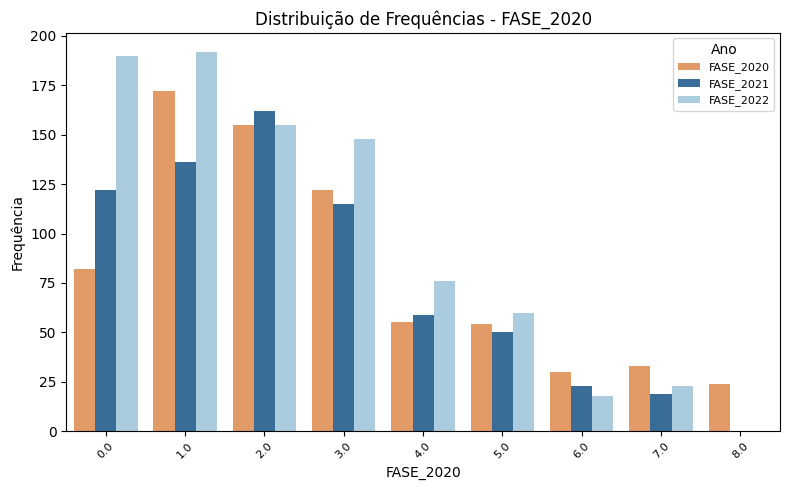

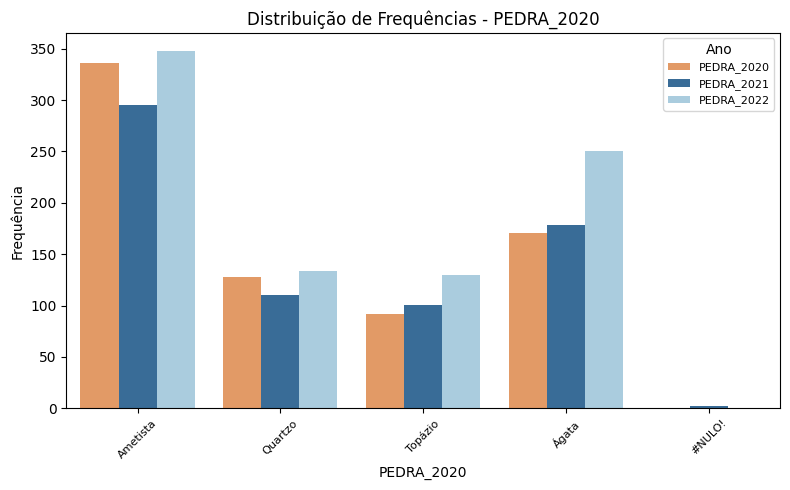

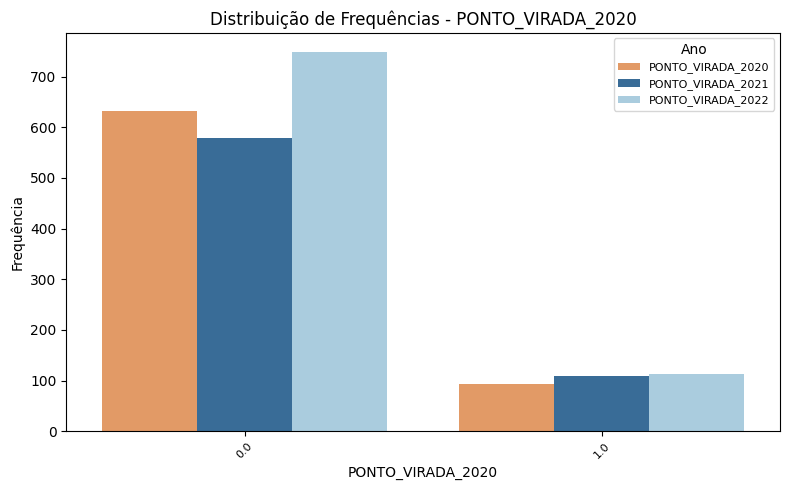

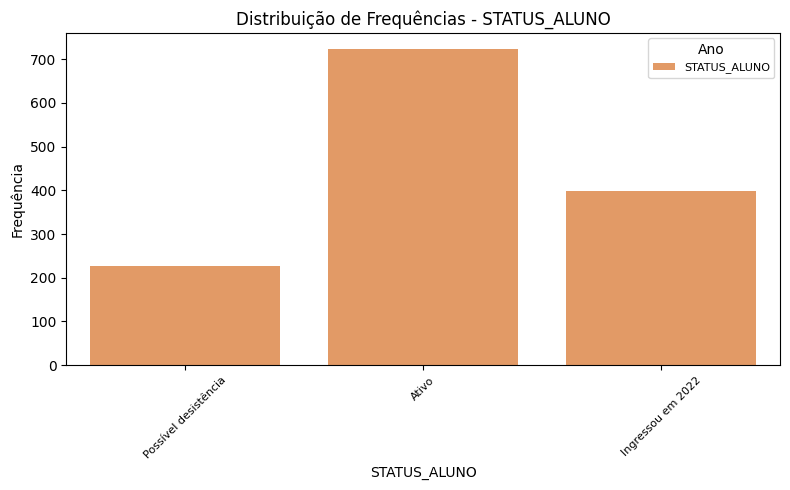

In [57]:
custom_palette = ['#F79651', '#2A6DA6', '#A2CFE6'] 
col_groups = [
    ['FASE_2020', 'FASE_2021', 'FASE_2022'],
    ['PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022'],
    ['PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022'],
    ['STATUS_ALUNO']
]

for col_group in col_groups:
    
    if all(col in df_clean.columns for col in col_group):
        
        melted_data = pd.melt(
            df_clean[col_group].reset_index(),
            id_vars=['index'], 
            var_name='Ano', 
            value_name=col_group[0]  
        )
        plt.figure(figsize=(8, 5))
        sns.countplot(
            data=melted_data, 
            x=col_group[0],  
            hue='Ano', 
            palette=custom_palette
        )
        plt.title(f"Distribuição de Frequências - {col_group[0]}", fontsize=12)
        plt.xlabel(col_group[0], fontsize=10)
        plt.ylabel("Frequência", fontsize=10)
        plt.xticks(rotation=45, fontsize=8)
        plt.legend(title="Ano", fontsize=8)
        plt.tight_layout()
        plt.show()



* **Alunos que Desistiram**

   2020  2021  2022
0   1.0    91    37
1   2.0    41    39
2   2.0    20    13
3   4.0    39    20
4   NaN    11    11
5   NaN    17     7
6   NaN     5     4
7   NaN     2     4
8   0.0     0     0


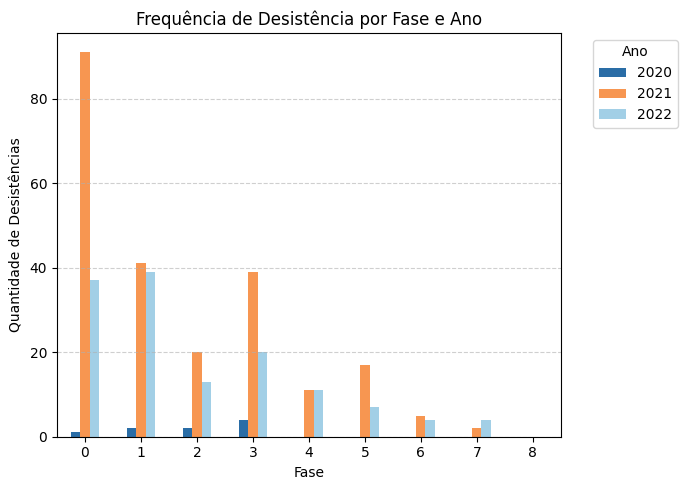

In [58]:
df_desistentes = df_clean[df_clean['STATUS_ALUNO'] == 'Possível desistência']
df_desistentes['Ultima_Fase'] = df_desistentes[categories['FASE']].idxmax(axis=1).str.replace('FASE_', '').astype(int)

desistencia_por_fase_ano = pd.DataFrame({
    '2020': df_desistentes[df_desistentes['FASE_2020'].notna()].groupby('FASE_2020').size(),
    '2021': df_desistentes[df_desistentes['FASE_2021'].notna()].groupby('FASE_2021').size(),
    '2022': df_desistentes[df_desistentes['FASE_2022'].notna()].groupby('FASE_2022').size()
})
desistencia_por_fase_ano = desistencia_por_fase_ano.reindex([0, 1, 2, 3, 4, 5, 6, 7, 8], fill_value=0)
print(desistencia_por_fase_ano)

ax = desistencia_por_fase_ano.plot(kind='bar', figsize=(7, 5), color=['#2A6DA6', '#F79651', '#A2CFE6'])
plt.title('Frequência de Desistência por Fase e Ano')
plt.ylabel('Quantidade de Desistências')
plt.xlabel('Fase')
plt.xticks(rotation=0)
plt.legend(title="Ano", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



* ### *Explorando as variáveis quantitativas*

* **Análise Descritiva:**

In [59]:
quantitative_columns_total = [
    'ANO_INGRESSO_2020', 'ANO_INGRESSO_2021', 'ANO_INGRESSO_2022',  
    'IAN_2020', 'IAN_2021','IAN_2022', 'IDA_2020','IDA_2021','IDA_2022', 
    'IEG_2020','IEG_2021', 'IEG_2022', 'IAA_2020','IAA_2021', 'IAA_2022',
    'IPS_2020','IPS_2021','IPS_2022', 'IPP_2020','IPP_2021', 'IPP_2022', 
    'IPV_2020','IPV_2021','IPV_2022', 'INDE_2020', 'INDE_2021', 'INDE_2022'
]

In [60]:
display(df_clean[quantitative_columns_total].describe())

,ANO_INGRESSO_2020,ANO_INGRESSO_2021,ANO_INGRESSO_2022,IAN_2020,IAN_2021,IAN_2022,IDA_2020,IDA_2021,IDA_2022,IEG_2020,...,IPS_2022,IPP_2020,IPP_2021,IPP_2022,IPV_2020,IPV_2021,IPV_2022,INDE_2020,INDE_2021,INDE_2022
count,727.000000,674.000000,862.000000,727.000000,686.000000,862.000000,727.000000,686.000000,862.000000,727.000000,...,862.000000,727.000000,686.000000,862.000000,727.000000,686.00000,862.000000,727.000000,684.000000,862.000000
mean,2018.532325,2019.412463,2020.496520,7.431224,6.902332,6.421114,6.322260,5.425948,6.070688,7.681155,...,6.901102,7.067859,7.576385,6.299364,7.242243,7.40758,7.247953,7.296111,6.888016,7.028338
std,1.131195,1.524118,1.787649,2.556944,2.484979,2.387816,2.960073,2.141566,2.059346,2.382122,...,1.070202,1.988054,1.072318,1.135510,1.775110,1.62708,1.098548,1.199925,1.354180,1.029912
min,2016.000000,2016.000000,2016.000000,2.500000,2.500000,2.500000,0.000000,0.000000,0.000000,0.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.00000,2.500010,3.065002,2.468000,3.031806
25%,2018.000000,2018.000000,2019.000000,5.000000,5.000000,5.000000,4.666667,4.100000,4.750000,6.600000,...,6.250000,6.953125,7.300000,5.625000,6.916665,6.60000,6.722220,6.569584,6.066250,6.472561
50%,2019.000000,2019.000000,2021.000000,5.000000,5.000000,5.000000,7.000000,5.850000,6.333333,8.500000,...,7.500000,7.500000,7.700000,6.250000,7.583335,7.70000,7.333335,7.580834,7.166000,7.193950
75%,2019.000000,2021.000000,2022.000000,10.000000,10.000000,10.000000,8.666667,6.900000,7.583333,9.500000,...,7.500000,8.125000,8.100000,7.031250,8.055557,8.60000,7.916665,8.178960,7.892750,7.749605
max,2020.000000,2021.000000,2022.000000,10.000000,10.000000,10.000000,10.000000,9.500000,9.916667,10.000000,...,10.000000,10.000000,10.000000,9.218750,10.000010,10.00000,10.000010,9.712504,9.294000,9.441522


* **Distribuição de Dados:**

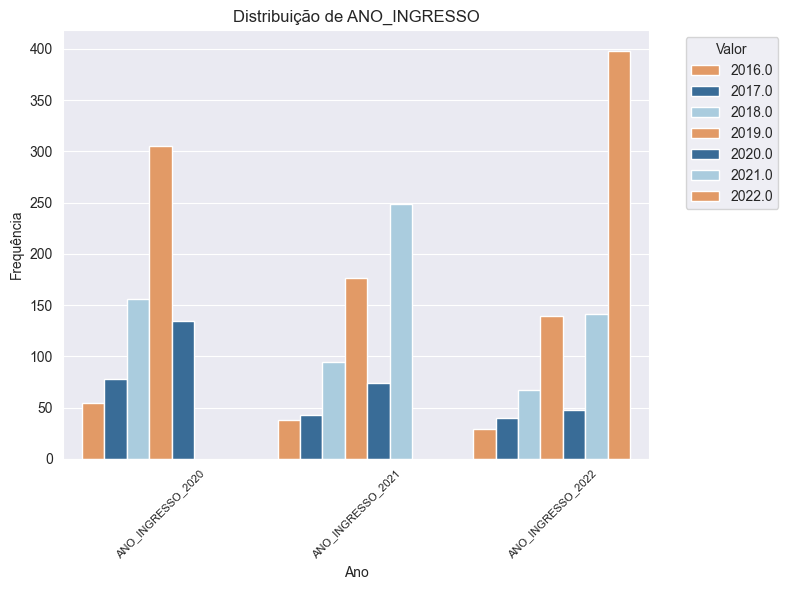

In [61]:
quantitative_ = {
    'ANO_INGRESSO': ['ANO_INGRESSO_2020', 'ANO_INGRESSO_2021', 'ANO_INGRESSO_2022'],
}

for category, columns in quantitative_.items():
    plt.figure(figsize=(8, 6))
    sns.set_style('darkgrid')
    data = pd.melt(df_clean[columns], var_name='Ano', value_name='Valor')

    sns.countplot(data=data, x='Ano', hue='Valor', palette=['#F79651', '#2A6DA6', '#A2CFE6'])
    plt.title(f'Distribuição de {category}', fontsize=12)
    plt.ylabel('Frequência', fontsize=10)
    plt.xlabel('Ano', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.legend(title='Valor', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

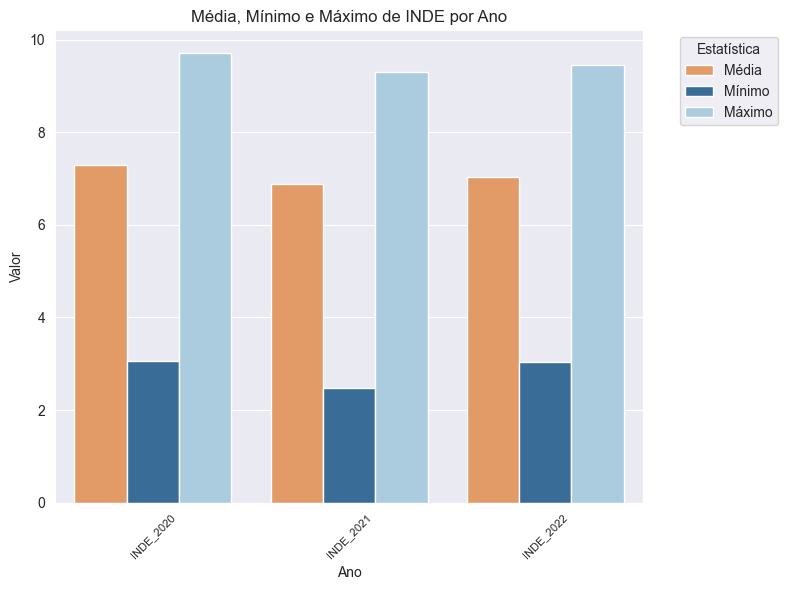

In [62]:
quantitative_ = {
    'INDE': ['INDE_2020', 'INDE_2021', 'INDE_2022']
}

for category, columns in quantitative_.items():
    plt.figure(figsize=(8, 6))
    sns.set_style('darkgrid')
    
    data = df_clean[columns].agg(['mean', 'min', 'max']).T.reset_index()
    data.columns = ['Ano', 'Média', 'Mínimo', 'Máximo']
    
    data_melted = pd.melt(data, id_vars=["Ano"], value_vars=["Média", "Mínimo", "Máximo"], 
                          var_name="Estatística", value_name="Valor")
    
    sns.barplot(data=data_melted, x='Ano', y='Valor', hue='Estatística', palette=['#F79651', '#2A6DA6', '#A2CFE6'])
    plt.title(f'Média, Mínimo e Máximo de {category} por Ano', fontsize=12)
    plt.ylabel('Valor', fontsize=10)
    plt.xlabel('Ano', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.legend(title='Estatística', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



* **Detecção de Outliers**

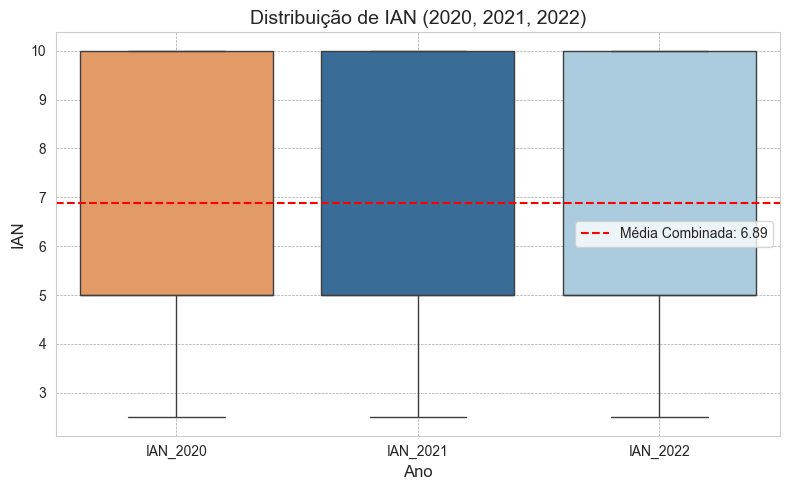

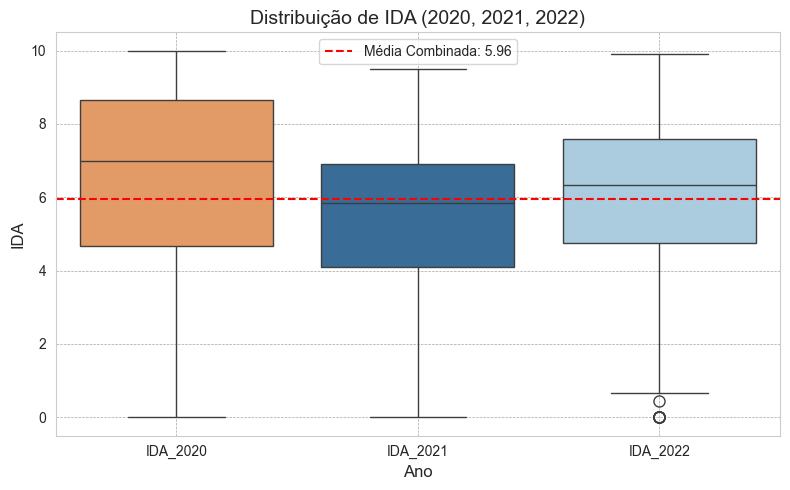

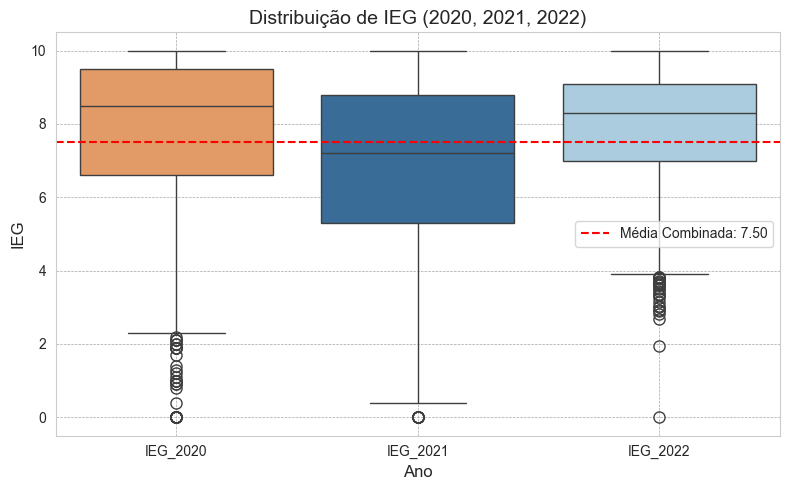

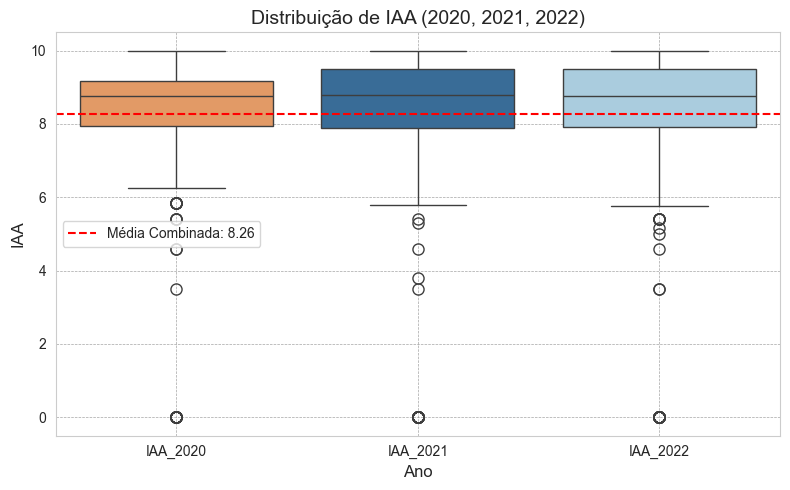

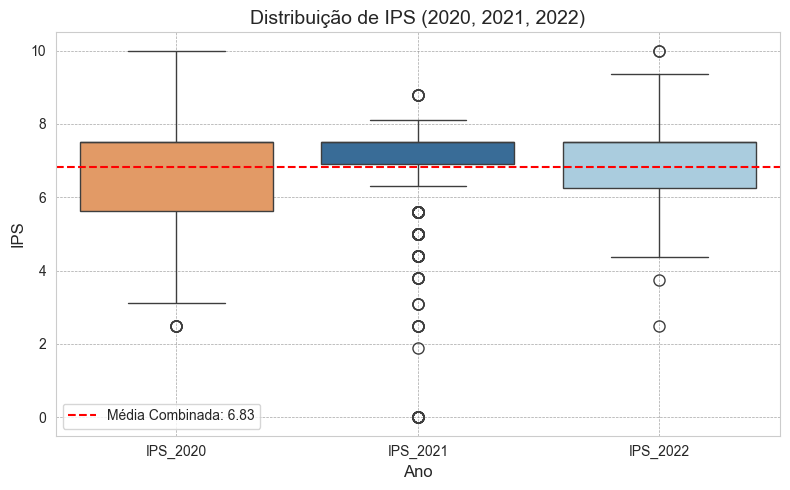

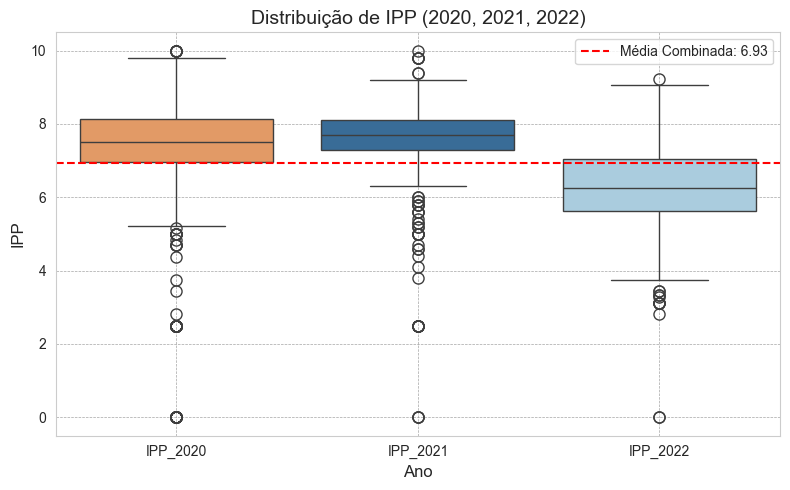

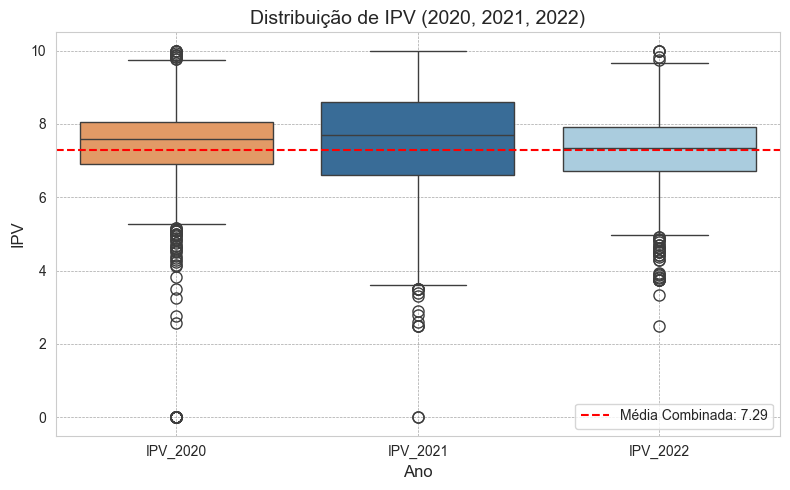

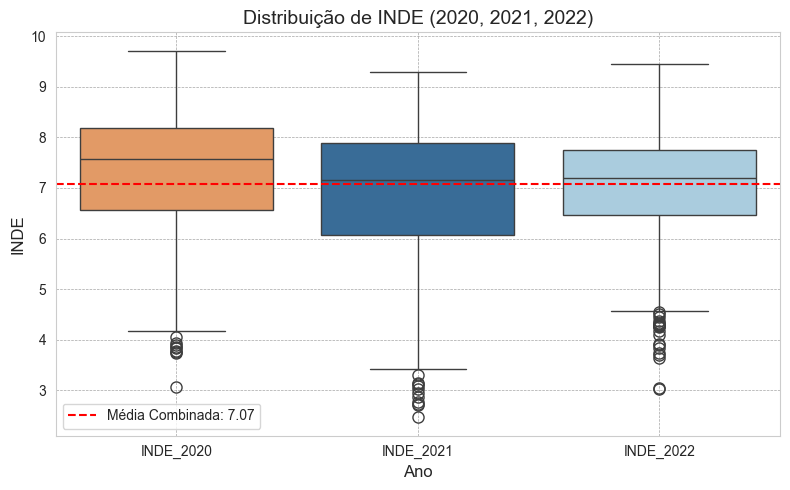

In [63]:
for col_base in ['IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP', 'IPV', 'INDE']:
    cols = [f"{col_base}_{year}" for year in [2020, 2021, 2022]]  
    df_plot = df_clean[cols].melt(var_name='Ano', value_name='Valor')
    
    plt.figure(figsize=(8, 5))  
    custom_palette = ['#F79651', '#2A6DA6', '#A2CFE6']
    sns.set_style('whitegrid')  
    sns.boxplot(x='Ano', y='Valor', data=df_plot, palette=custom_palette, fliersize=8)
    combined_mean = df_plot['Valor'].mean()
    plt.axhline(combined_mean, color='red', linestyle='--', label=f'Média Combinada: {combined_mean:.2f}')
    plt.title(f'Distribuição de {col_base} (2020, 2021, 2022)', fontsize=14)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel(f'{col_base}', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()


* **Correlação entre Variáveis**

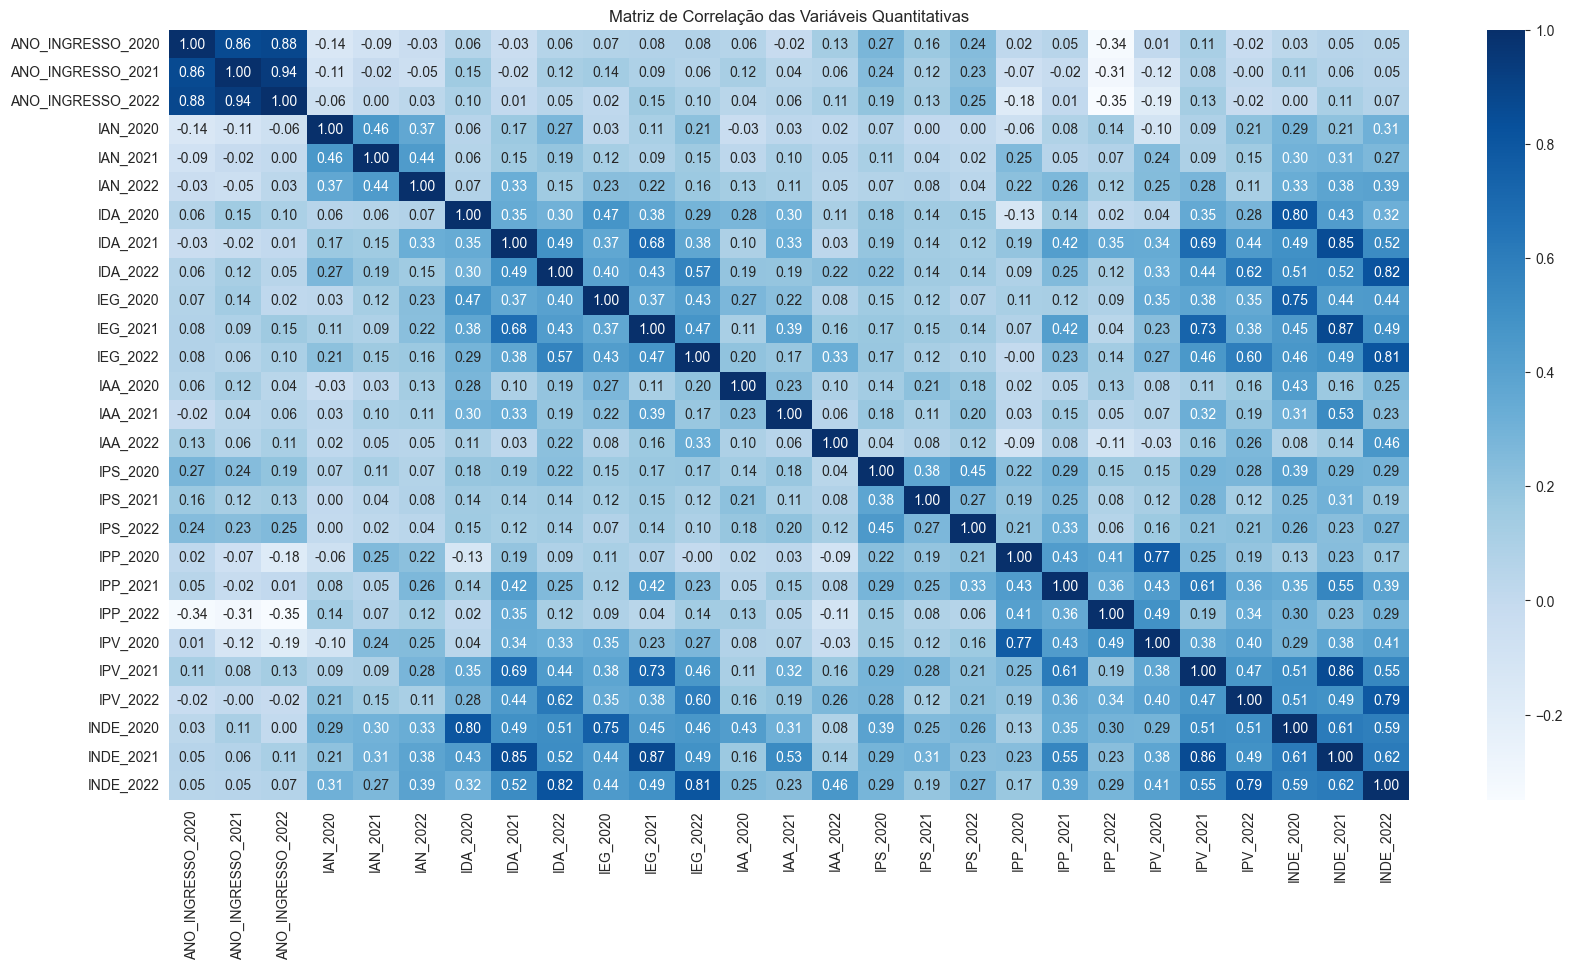

In [64]:
correlation_matrix = df_clean[quantitative_columns_total].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de Correlação das Variáveis Quantitativas')
plt.show()

* **Análise Temporal**

*Tendências Anuais:*

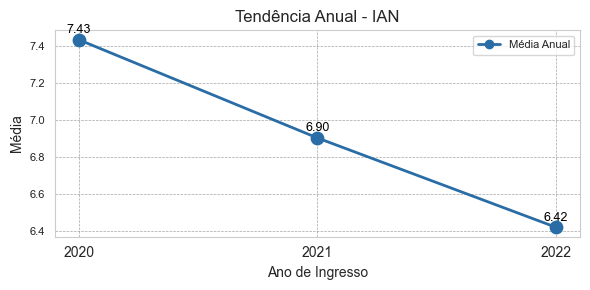

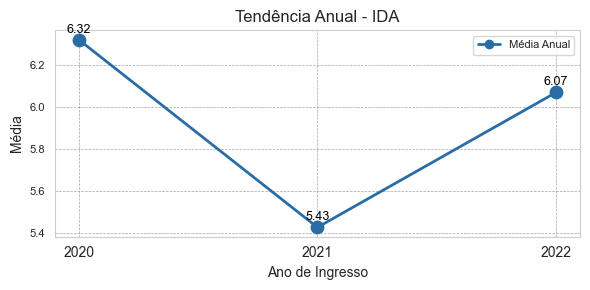

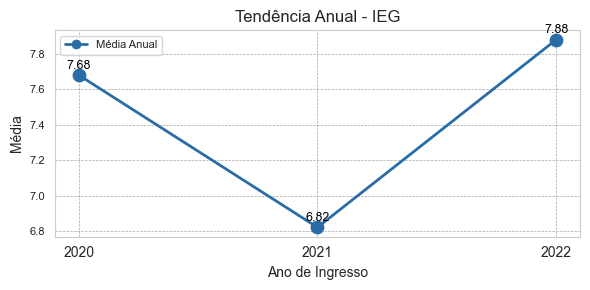

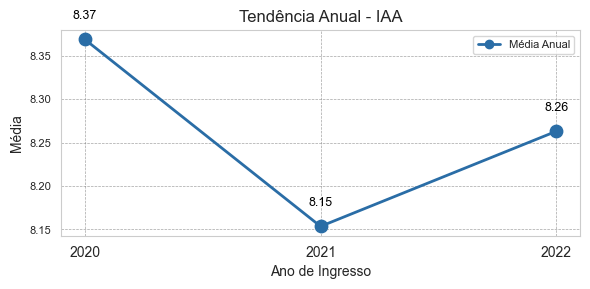

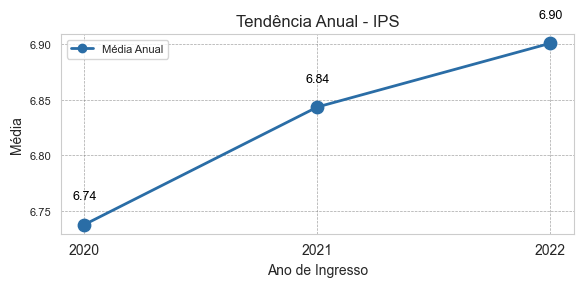

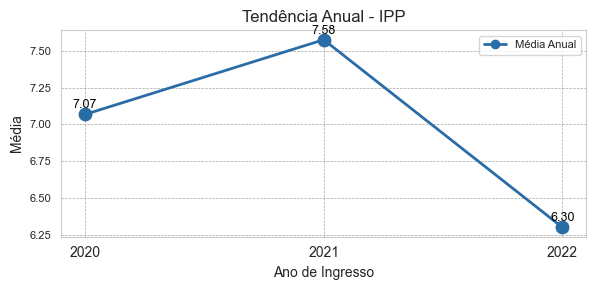

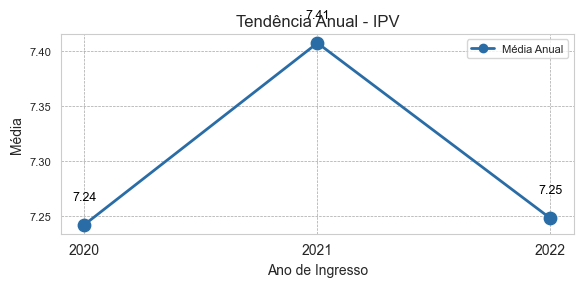

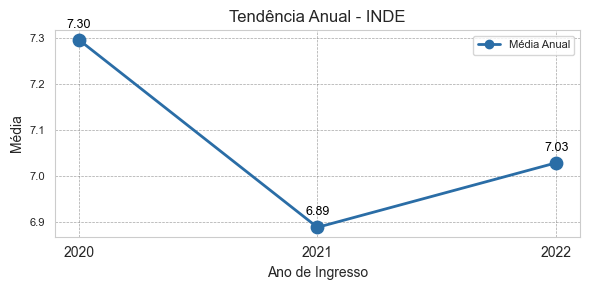

In [65]:
for col_base in ['IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP', 'IPV', 'INDE']:
    plt.figure(figsize=(6, 3))  
    sns.set_style('whitegrid')  
    cols = [f"{col_base}_{year}" for year in [2020, 2021, 2022]]
    mean_values = df_clean[cols].mean()
    plt.plot(mean_values.index, mean_values.values, marker='o', color='#2A6DA6', linewidth=2, label='Média Anual')

    for year, value in zip(mean_values.index, mean_values.values):
        plt.scatter(year, value, color='#2A6DA6', s=80, zorder=5)
        plt.text(year, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=9, color='black')

    plt.title(f"Tendência Anual - {col_base}", fontsize=12)
    plt.xlabel('Ano de Ingresso', fontsize=10)
    plt.ylabel("Média", fontsize=10)

    plt.xticks(ticks=mean_values.index, labels=[c.split('_')[-1] for c in mean_values.index], fontsize=10)
    plt.yticks(fontsize=8)

    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=8, loc='best')
    plt.tight_layout()
    plt.show()


 
* **Visualização de Densidade:**

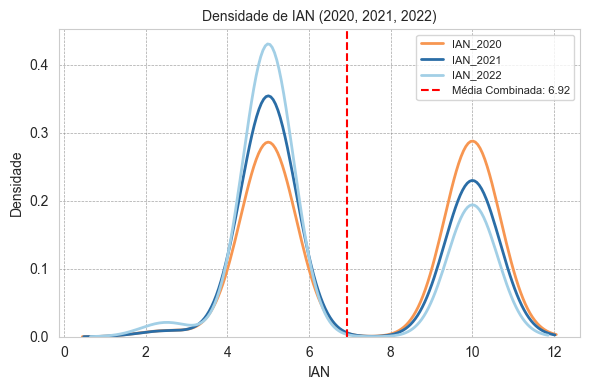

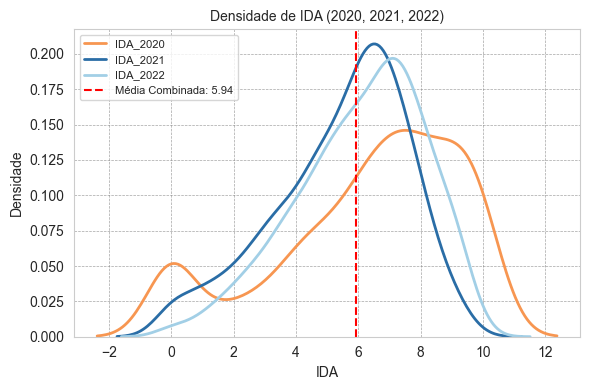

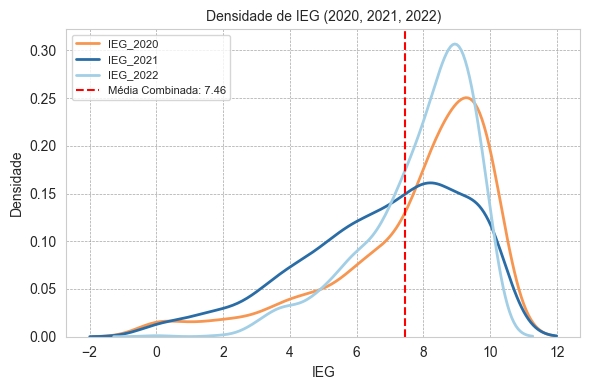

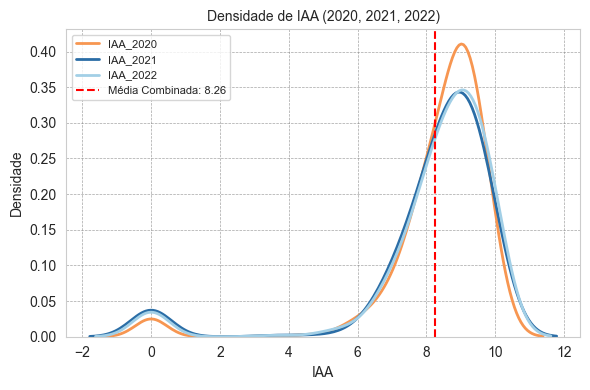

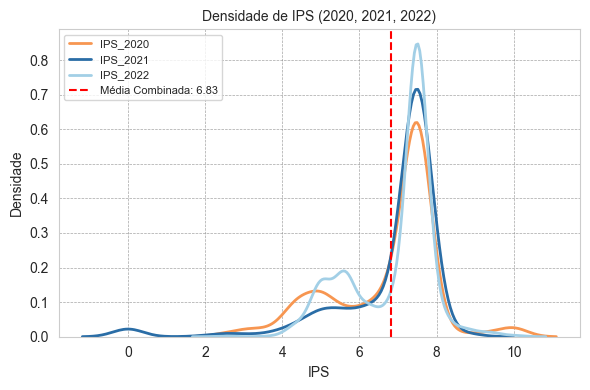

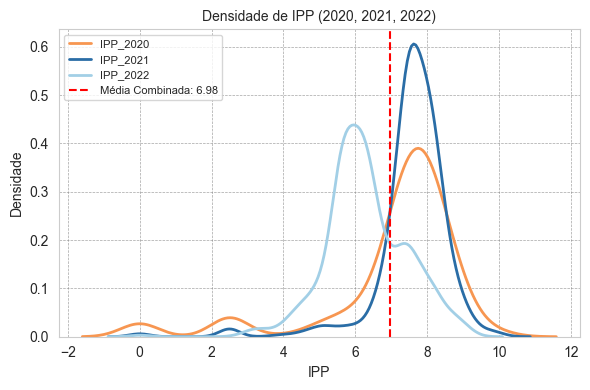

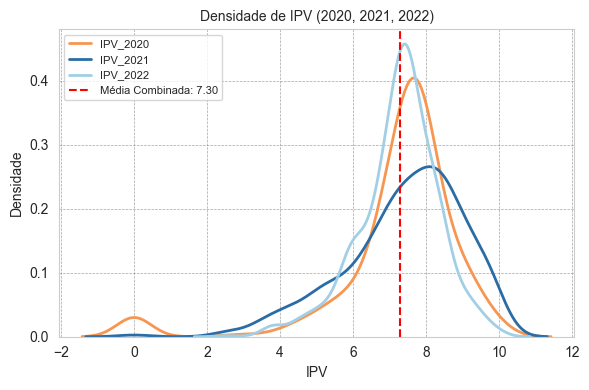

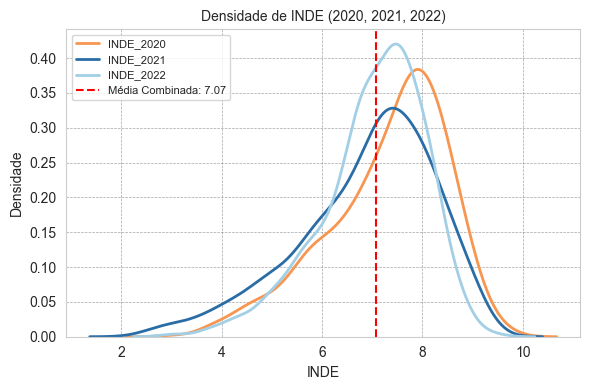

In [66]:

for col_base in ['IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP', 'IPV', 'INDE']:
    cols = [f"{col_base}_{year}" for year in [2020, 2021, 2022]] 
    
    plt.figure(figsize=(6, 4)) 
    sns.set_style('whitegrid')  
    
    mean_values = [] 

    for column, color in zip(cols, ['#F79651', '#2A6DA6', '#A2CFE6']): 
        if column in df_clean.columns:  
            sns.kdeplot(df_clean[column].dropna(), 
                        label=column, 
                        color=color, 
                        linewidth=2)
            mean_value = df_clean[column].mean()
            mean_values.append(mean_value)
    if mean_values: 
        combined_mean = sum(mean_values) / len(mean_values)
        plt.axvline(combined_mean, color='red', linestyle='--', linewidth=1.5, label=f'Média Combinada: {combined_mean:.2f}')

    plt.title(f'Densidade de {col_base} (2020, 2021, 2022)', fontsize=10)
    plt.xlabel(f'{col_base}', fontsize=10)
    plt.ylabel('Densidade', fontsize=10)
    plt.legend(fontsize=8)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

# Questões:
 

1. Saber em qual fase o aluno parou (Data de Entrada e Saída)

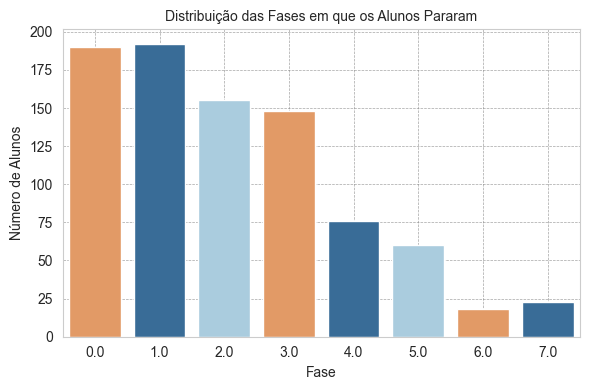

In [67]:
df_clean['FASE_PARADA'] = df_clean[['FASE_2020', 'FASE_2021', 'FASE_2022']].bfill(axis=1).iloc[:, -1]
custom_palette = ['#F79651', '#2A6DA6', '#A2CFE6']
fase_counts = df_clean['FASE_PARADA'].value_counts()

plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')
sns.barplot(x=fase_counts.index, y=fase_counts.values, palette=custom_palette)
plt.title("Distribuição das Fases em que os Alunos Pararam", fontsize=10)
plt.xlabel("Fase", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

2. Justificativa de desistência: Índices menores

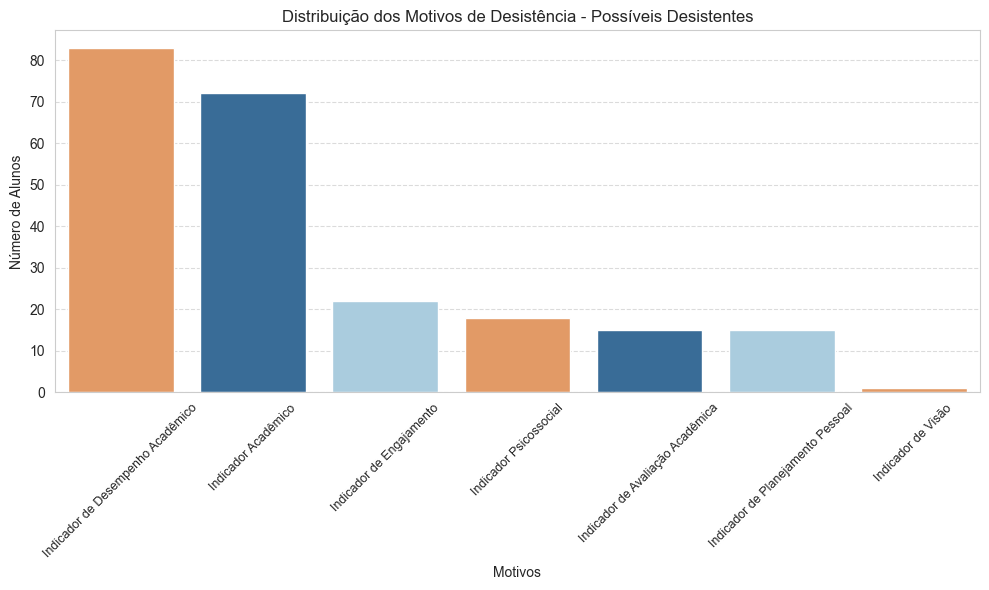

In [68]:
# Selecionar apenas as colunas relevantes e os alunos com "Possível desistência"
colunas_abordadas = [
    'IAN_2020', 'IAN_2021', 'IAN_2022', 'IDA_2020', 'IDA_2021', 'IDA_2022',
    'IEG_2020', 'IEG_2021', 'IEG_2022', 'IAA_2020', 'IAA_2021', 'IAA_2022',
    'IPS_2020', 'IPS_2021', 'IPS_2022', 'IPP_2020', 'IPP_2021', 'IPP_2022',
    'IPV_2020', 'IPV_2021', 'IPV_2022'
]

df_desistencia = df_clean[df_clean['STATUS_ALUNO'] == 'Possível desistência'][colunas_abordadas]
df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia.idxmin(axis=1)
traducao_motivos = {
    'IAN': 'Indicador Acadêmico',
    'IDA': 'Indicador de Desempenho Acadêmico',
    'IEG': 'Indicador de Engajamento',
    'IAA': 'Indicador de Avaliação Acadêmica',
    'IPS': 'Indicador Psicossocial',
    'IPP': 'Indicador de Planejamento Pessoal',
    'IPV': 'Indicador de Visão'
}

df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia['MOTIVO_DESISTENCIA'].str.extract(r'(\w+)_\d+')
df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia['MOTIVO_DESISTENCIA'].map(traducao_motivos)

motivos_counts = df_desistencia['MOTIVO_DESISTENCIA'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=motivos_counts.index, y=motivos_counts.values, palette=custom_palette)
plt.title("Distribuição dos Motivos de Desistência - Possíveis Desistentes", fontsize=12)
plt.xlabel("Motivos", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




3. Tempo de Permanência para alunos com "Possível desistência

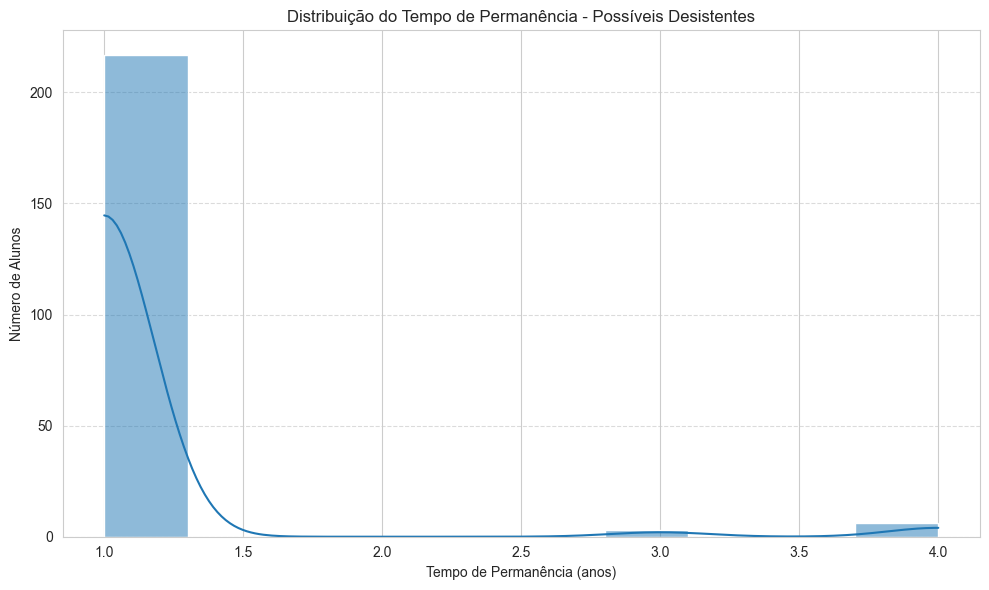

Média de tempo de permanência dos alunos classificados como 'Possível desistência': 1.11 anos


In [69]:
df_desistencia = df_clean[df_clean['STATUS_ALUNO'] == 'Possível desistência'].copy()

if 'ANO_INGRESSO' in df_desistencia.columns and 'ANO_SAIDA' in df_desistencia.columns:
    df_desistencia['TEMPO_PERMANENCIA'] = df_desistencia['ANO_SAIDA'] - df_desistencia['ANO_INGRESSO']
else:
    # Caso não tenha uma coluna explícita de saída, calcular com base no último ano de dados (2022 neste exemplo)
    df_desistencia['TEMPO_PERMANENCIA'] = 2022 - df_desistencia['ANO_INGRESSO_2020'].fillna(
        df_desistencia['ANO_INGRESSO_2021']).fillna(
        df_desistencia['ANO_INGRESSO_2022']
    )

plt.figure(figsize=(10, 6))
sns.histplot(df_desistencia['TEMPO_PERMANENCIA'], kde=True, palette=custom_palette, bins=10)
plt.title("Distribuição do Tempo de Permanência - Possíveis Desistentes", fontsize=12)
plt.xlabel("Tempo de Permanência (anos)", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

media_tempo = df_desistencia['TEMPO_PERMANENCIA'].mean()
print(f"Média de tempo de permanência dos alunos classificados como 'Possível desistência': {media_tempo:.2f} anos")

4. Justificativa de Permanência (Índices Maiores)

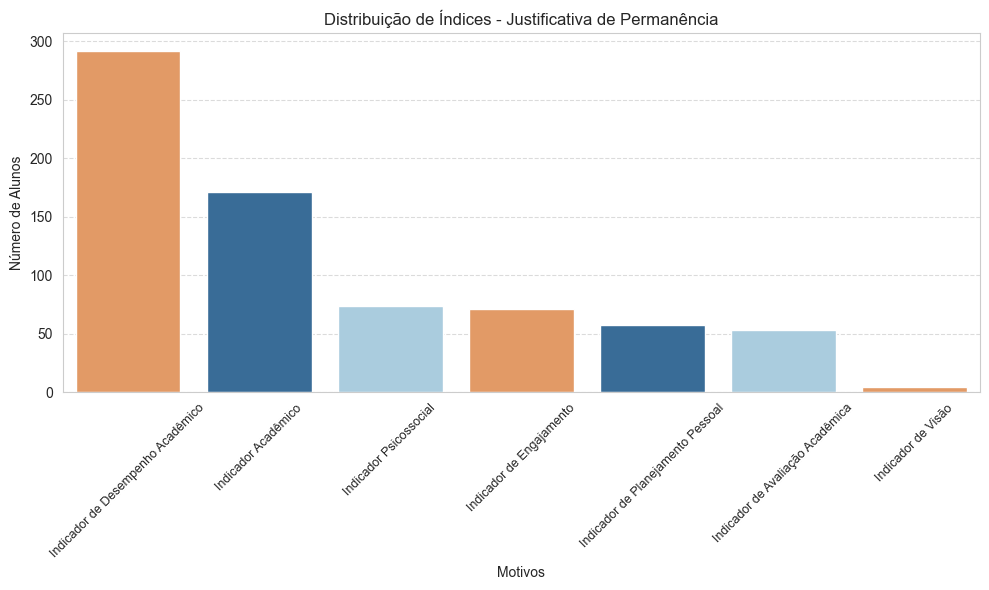

In [70]:
# Selecionar apenas as colunas relevantes e os alunos com "Ativo"
df_permanencia = df_clean[df_clean['STATUS_ALUNO'] == 'Ativo'][colunas_abordadas]

# Função para identificar o motivo de permanência baseado no menor valor por linha
df_permanencia['MOTIVO_PERMANENCIA'] = df_permanencia.idxmin(axis=1).str.extract(r'(\w+)_\d+')

# Mapear os valores para a descrição dos motivos
df_permanencia['MOTIVO_PERMANENCIA'] = df_permanencia['MOTIVO_PERMANENCIA'].map(traducao_motivos)

# Contar as ocorrências de cada motivo de permanência
motivos_counts = df_permanencia['MOTIVO_PERMANENCIA'].value_counts()

# Gráfico de distribuição dos motivos de permanência
plt.figure(figsize=(10, 6))
sns.barplot(x=motivos_counts.index, y=motivos_counts.values, palette=custom_palette)
plt.title("Distribuição de Índices - Justificativa de Permanência", fontsize=12)
plt.xlabel("Motivos", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




5. Tempo de permanência dos alunos na fase 7

      FASE_PARADA  PERMANENCIA_ANOS
31            7.0               6.0
137           7.0               5.0
138           7.0               6.0
199           7.0               5.0
208           7.0               6.0
295           7.0               5.0
305           7.0               4.0
319           7.0               3.0
504           7.0               6.0
509           7.0               2.0
596           7.0               6.0
735           7.0               1.0
788           7.0               1.0
856           7.0               1.0
900           7.0               1.0
970           7.0               0.0
984           7.0               0.0
1066          7.0               0.0
1113          7.0               0.0
1176          7.0               0.0
1226          7.0               0.0
1279          7.0               0.0
1292          7.0               0.0


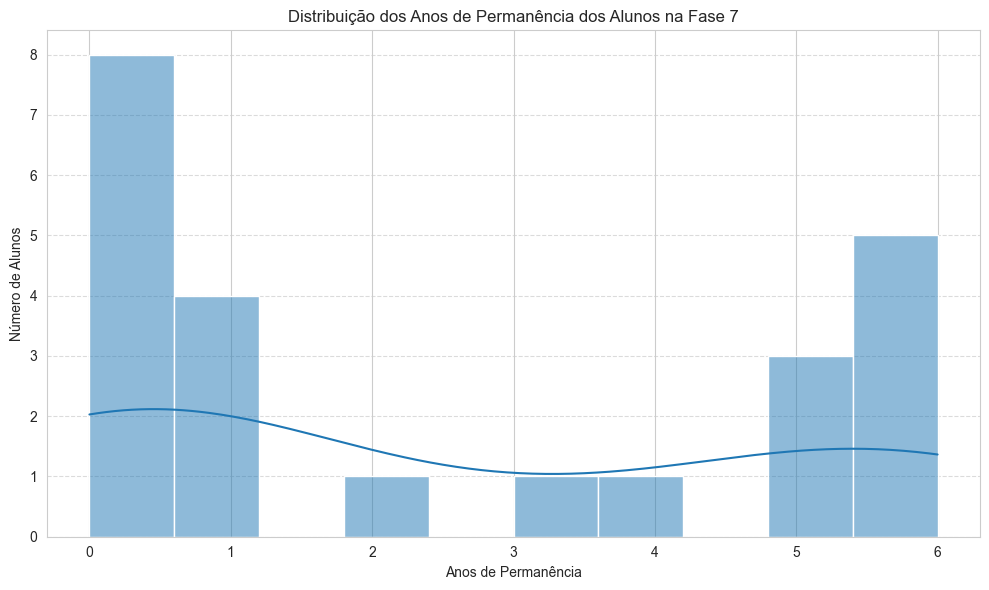

In [71]:
df_fase7 = df_clean[df_clean['FASE_PARADA'] == 7]

# Calcular a diferença de anos entre o ano de ingresso e o ano mais recente disponível
# Supondo que temos uma coluna com o ano de ingresso do aluno, por exemplo, 'ANO_INGRESSO_2020', 'ANO_INGRESSO_2021', etc.
# Vamos calcular a permanência baseada no ano mais recente
df_fase7['ANO_PERMANENCIA'] = df_fase7[['ANO_INGRESSO_2020', 'ANO_INGRESSO_2021', 'ANO_INGRESSO_2022']].bfill(axis=1).iloc[:, -1]
df_fase7['PERMANENCIA_ANOS'] = 2022 - df_fase7['ANO_PERMANENCIA']

# Verificar a distribuição dos anos de permanência dos alunos na fase 7
print(df_fase7[['FASE_PARADA', 'PERMANENCIA_ANOS']])

# Visualizar a distribuição de anos de permanência
plt.figure(figsize=(10, 6))
sns.histplot(df_fase7['PERMANENCIA_ANOS'], kde=True, palette=custom_palette, bins=10)
plt.title("Distribuição dos Anos de Permanência dos Alunos na Fase 7", fontsize=12)
plt.xlabel("Anos de Permanência", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

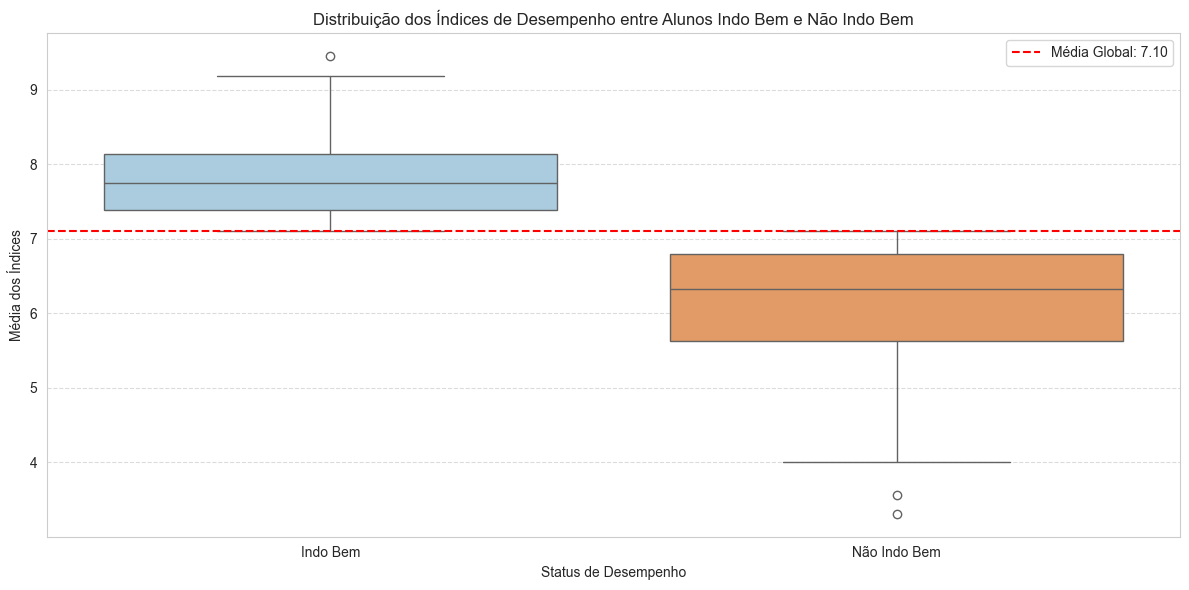

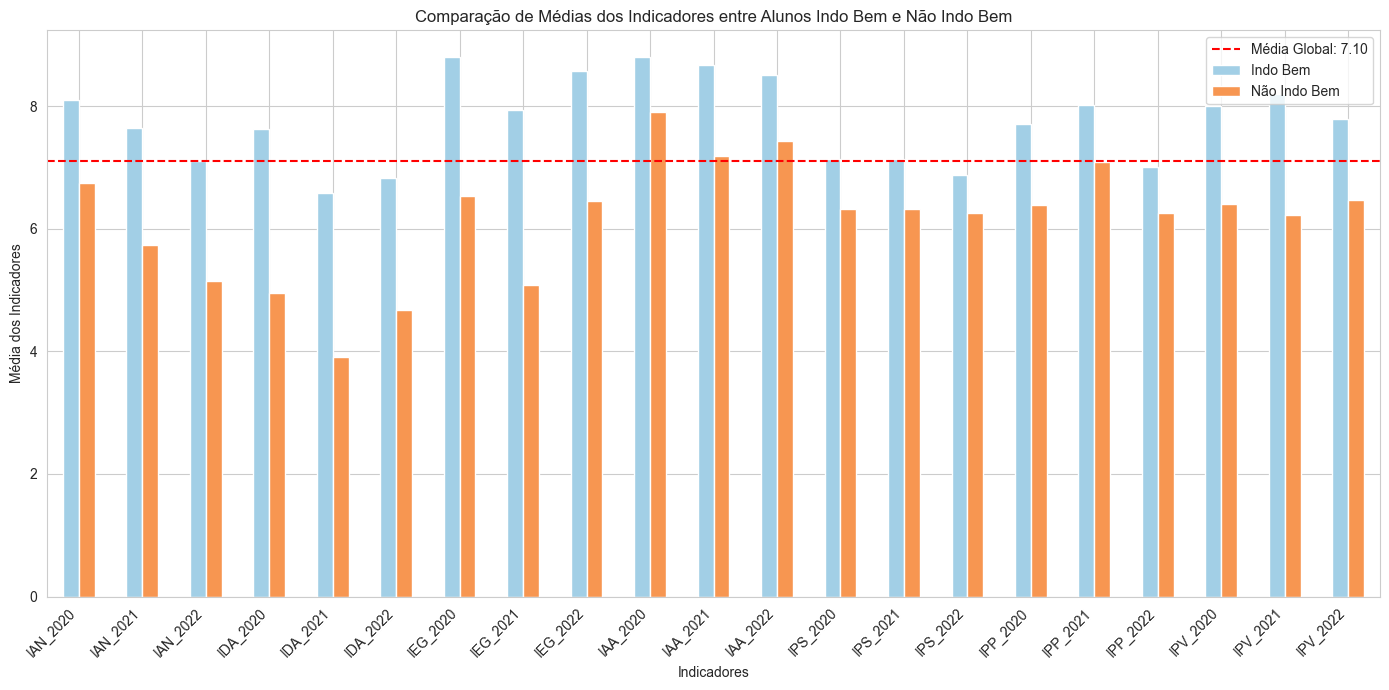

Média global dos índices: 7.10


In [76]:
# Selecionar apenas os alunos ativos
df_ativos = df_clean[df_clean['STATUS_ALUNO'] == 'Ativo']
indices = ['IAN_2020', 'IAN_2021', 'IAN_2022', 'IDA_2020', 'IDA_2021', 'IDA_2022', 
           'IEG_2020', 'IEG_2021', 'IEG_2022', 'IAA_2020', 'IAA_2021', 'IAA_2022',
           'IPS_2020', 'IPS_2021', 'IPS_2022', 'IPP_2020', 'IPP_2021', 'IPP_2022', 
           'IPV_2020', 'IPV_2021', 'IPV_2022']

df_ativos['MEDIA_INDICES'] = df_ativos[indices].mean(axis=1)

media_global = df_ativos[indices].stack().mean()
limite_bem = media_global

df_ativos['STATUS_DESEMPENHO'] = ['Indo Bem' if x > limite_bem else 'Não Indo Bem' for x in df_ativos['MEDIA_INDICES']]
df_comparacao = df_ativos.groupby('STATUS_DESEMPENHO')[indices].mean()

# comparações entre os grupos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_ativos, x='STATUS_DESEMPENHO', y='MEDIA_INDICES', palette=['#A2CFE6', '#F79651'])
plt.title('Distribuição dos Índices de Desempenho entre Alunos Indo Bem e Não Indo Bem', fontsize=12)
plt.xlabel('Status de Desempenho', fontsize=10)
plt.ylabel('Média dos Índices', fontsize=10)
plt.axhline(y=media_global, color='red', linestyle='--', label=f'Média Global: {media_global:.2f}')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# omparações entre indicadores
df_comparacao.T.plot(kind='bar', figsize=(14, 7), color=['#A2CFE6', '#F79651'])
plt.title('Comparação de Médias dos Indicadores entre Alunos Indo Bem e Não Indo Bem', fontsize=12)
plt.ylabel('Média dos Indicadores', fontsize=10)
plt.xlabel('Indicadores', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=media_global, color='red', linestyle='--', label=f'Média Global: {media_global:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Média global dos índices: {media_global:.2f}")


In [72]:
'''
Predição de desempenho futuro e análise de outliers (O que fez alguns alunos serem um dos melhores que já passou na Passos?)
Predição para recomendação de bolsas, intercambio, etc
Análise comparatória de 2020, 2021 e 2022
Análise de alunos (de forma individual? 🤔) ao longo dos anos (Ex: temos dados do 'ALUNO 1' em 2020 e 2021, já em 2022 não temos dados... Seria talvez desistência?)
Análise de alunos que estão indo bem Vs alunos que não estão indo bem. Tentar entender o porquê um aluno vai bem e outro não.
Tentar prever qual seria a “pedra” de um novo aluno com X pontuações de índices em uma nova entrada
'''

"\nPredição de desempenho futuro e análise de outliers (O que fez alguns alunos serem um dos melhores que já passou na Passos?)\nPredição para recomendação de bolsas, intercambio, etc\nAnálise comparatória de 2020, 2021 e 2022\nAnálise de alunos (de forma individual? 🤔) ao longo dos anos (Ex: temos dados do 'ALUNO 1' em 2020 e 2021, já em 2022 não temos dados... Seria talvez desistência?)\nAnálise de alunos que estão indo bem Vs alunos que não estão indo bem. Tentar entender o porquê um aluno vai bem e outro não.\nTentar prever qual seria a “pedra” de um novo aluno com X pontuações de índices em uma nova entrada\n"